NAIVE BAYES

In [1]:
# lda
import pandas as pd
import matplotlib as plt
import numpy as np
from sklearn.model_selection import train_test_split

D:\anaconda\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
! pip install --upgrade pandas


Requirement already up-to-date: pandas in d:\anaconda\lib\site-packages (2.0.3)


(4, 4)
(120, 2)


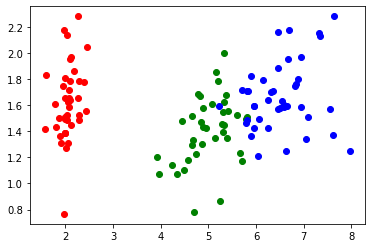

old : (120, 4)
new :  (120, 2)


In [15]:
class LDA:
    def __init__(self,n_comp):
        self.n_comp=n_comp
        self.eigvec=None
    def transform(self,X,Y):
        hei,wid=X.shape
        uni_classes=np.unique(Y)
        no_classes=len(uni_classes)
        
        #tweb
        sct_t=np.cov(X.T)*(hei-1)
        sct_w=0
        for i in range(no_classes):
            class_item=np.flatnonzero(Y==uni_classes[i])
            sct_w=sct_w+np.cov(X[class_item].T)*(len(class_item)-1)
        sct_b=sct_t-sct_w
        _,eigvec=np.linalg.eigh(np.linalg.pinv(sct_w).dot(sct_b))
        print(eigvec.shape)
        pc=X.dot(eigvec[:,::-1][:,:self.n_comp])
        print(pc.shape)
        
        if self.n_comp==2:
            if Y is None:
                plt.scatter(pc[:,0],pc[:,1])
            else:
                clr=["r","g","b"]
                label=np.unique(Y)
                for clr,label in zip(clr,label):
                    class_data=pc[np.flatnonzero(Y==label)]
                    plt.scatter(class_data[:,0],class_data[:,1],c=clr)
            plt.show()
        return pc

df=pd.read_csv("Iris.csv")
df=df.drop(columns=["Id"],axis=1)
X=df.drop("Species",axis=1).values
Y=df["Species"].values

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

lda=LDA(2)
X_train_mod=lda.transform(X_train,Y_train)

print("old :",X_train.shape)
print("new : ",X_train_mod.shape)

In [58]:
# pda

class PCA:
    def __init__(self,n_comp):
        self.n_comp=n_comp
        self.comp=None
        self.mean=None
        
    def fit(self,X):
        self.mean=np.mean(X,axis=0)
        X=X-self.mean
        cov=np.cov(X.T)
        eigvec,eigval=np.linalg.eig(cov)
        eigvec=eigvec.T
        index=np.argsort(eigval)[::-1]
        eigval=eigval[index]
        eigvec=eigvec[index]
        
        self.comp=eigvec[:self.n_comp]
        
    def transform(self,X):
        X=X-self.mean
        return np.dot(X,self.comp.T)



In [59]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
X=df.drop(columns=["Species","Id"]).values
df.replace({"Species":{"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2}},inplace=True)
Y=df["Species"].values

Shape : (150, 4)
 After shape :  (150, 2)


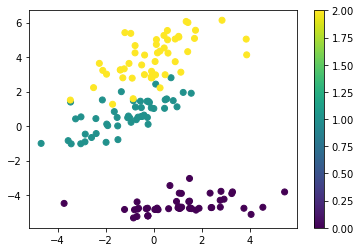

In [61]:
pca=PCA(2)
pca.fit(X)
X_project=pca.transform(X)

print("Shape :",X.shape)
print(" After shape : ",X_project.shape)
plt.scatter(X_project[:,0],X_project[:,1],c=Y)
plt.colorbar()
plt.show()

naive

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

def calc_prior(df,Y):
    classes=sorted(list(df[Y].unique()))
    prior=[]
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

def calc_likelihood(df,Y,label,f_name,f_val):
    df=df[df[Y]==label]
    mean,std=df[f_name].mean(),df[f_name].std()
    p_x_g_y=(1/(np.sqrt(2*np.pi)*std))*np.exp(-((f_val-mean)**2/(2 * std**2)))
    return p_x_g_y
def naive_bayes(df,X,Y):
    f=list(df.columns)[1:]
    prior=calc_prior(df,Y)
    
    Y_pred=[]
    for x in X:
        label=sorted(list(df[Y].unique()))
        likelihood=[1]*len(label)
        for i in range(len(label)):
            for j in range(len(f)):
                likelihood[i]*=calc_likelihood(df,Y,label[i],f[j],x[j])
        post_prob=[1]*label
        for i in range(len(label)):
            post_prob[i]=prior[i]*likelihood[i]
        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred)

In [74]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [76]:
df=df.drop(columns=["PassengerId","Name","Ticket","Fare","Cabin"],axis=1)

In [77]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [78]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [79]:
df["Embarked"].fillna('S',inplace=True)

In [80]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [81]:
df.replace({"Sex":{"male":0,"female":1}},inplace=True)
df.replace({"Embarked": {'S':0,'C':1,'Q':2}},inplace=True)

In [82]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.000000,1,0,0
1,1,1,1,38.000000,1,0,1
2,1,3,1,26.000000,0,0,0
3,1,1,1,35.000000,1,0,0
4,0,3,0,35.000000,0,0,0
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,0
887,1,1,1,19.000000,0,0,0
888,0,3,1,29.699118,1,2,0
889,1,1,0,26.000000,0,0,1


In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

def calc_prior(df,Y):
    classes=sorted(list(df[Y].unique()))
    prior=[]
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

def calc_likelihood(df,Y,label,f_name,f_val):
    df=df[df[Y]==label]
    mean,std=df[f_name].mean(),df[f_name].std()
    p_x_g_y=(1/(np.sqrt(2*np.pi)*std))*np.exp(-((f_val-mean)**2/(2 * std**2)))
    return p_x_g_y
def naive_bayes(df,X,Y):
    f=list(df.columns)[1:]
    prior=calc_prior(df,Y)
    
    Y_pred=[]
    for x in X:
        label=sorted(list(df[Y].unique()))
        likelihood=[1]*len(label)
        for i in range(len(label)):
            for j in range(len(f)):
                likelihood[i]*=calc_likelihood(df,Y,label[i],f[j],x[j])
        post_prob=[1]*len(label)
        for i in range(len(label)):
            post_prob[i]=prior[i]*likelihood[i]
        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred)

In [87]:
train,test=train_test_split(df,test_size=0.3,random_state=41)
X_test=test.iloc[:,1:].values
Y_test=test.iloc[:,0].values

Y_pred=naive_bayes(train,X=X_test,Y="Survived")

print("confusion matrix : ")
print(confusion_matrix(Y_test,Y_pred))
print("Accuracy: ",accuracy_score(Y_test,Y_pred))
print("Classification report : ")
print(classification_report(Y_test,Y_pred))

print("Enter the new value : ")
check=[3,0,39,1,5,0]
ans=naive_bayes(train,X=[check],Y="Survived")
print("Ans : ",ans)

confusion matrix : 
[[126  36]
 [ 21  85]]
Accuracy:  0.7873134328358209
Classification report : 
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       162
           1       0.70      0.80      0.75       106

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.80      0.79      0.79       268

Enter the new value : 
Ans :  [0]


In [94]:
def kmeans(X,k,max_iter=100):
    cen=X[:k]
    for _ in range(max_iter):
        label=np.argmin(np.linalg.norm(X[:,np.newaxis]-cen,axis=2),axis=1)
        new_cen=np.array([X[label==i].mean(axis=0) for i in range(k)])
        if np.all(cen==new_cen):
            break
        cen=new_cen
    return label,cen

data = pd.read_csv('Iris.csv')
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [95]:
data.replace({'Species' : {"Iris-setosa" : 0,"Iris-virginica": 2,"Iris-versicolor":1}},inplace=True)
X=data.drop(columns=["Species","Id"],axis=1).values

Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
Centroids: [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.418      1.464      0.244     ]]
Accuarcy :  0.31333333333333335


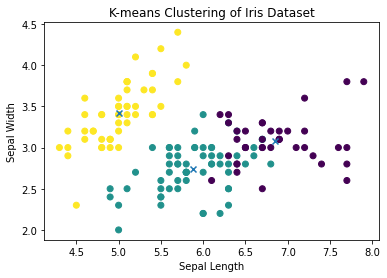

In [96]:
k=3
label,cen=kmeans(X,k)

print("Labels:",label)
print("Centroids:",cen)

Y_actual=list(data["Species"])
Y_pred=list(label)

cnt=0
for i in range(len(Y_actual)):
    if(Y_actual[i]==Y_pred[i]):
        cnt=cnt+1

print("Accuarcy : ",(cnt/len(Y_actual)))

plt.scatter(X[:, 0], X[:, 1], c=label)
plt.scatter(cen[:, 0], cen[:, 1], marker='x')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering of Iris Dataset')
plt.show()

knn galss

In [97]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix